[![logo](https://raw.githubusercontent.com/ecmwf-training/cams-act6/main/images/logoline.png)](https://atmosphere.copernicus.eu/6th-ecmwf-cams-esa-eumetsat-training-atmospheric-composition)

# CAMS Global Reanalysis Practical

**Run the tutorial via free cloud platforms**: [![binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/ecmwf-training/cams-act6/main?labpath=03-model/cams-global-reanalysis.ipynb)
[![kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/ecmwf-training/cams-act6/blob/main/03-model/cams-global-reanalysis.ipynb)
[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ecmwf-training/cams-act6/blob/main/03-model/cams-global-reanalysis.ipynb)


## Learning objectives

- In this practical exercise you will learn how to download CAMS Global Reanalysis (EAC4) data programmatically using the Application Programming Interface (API) of the Atmosphere Data Store (ADS).
- You will also learn how to read the data into a Python object and explore its characteristics, including data dimensions, units, etc.
- Having explored the data, you will calculate the June climatology for dust AOD at 550nm for the period 2003 to 2023.
- Finally, you will explore the famous Godzilla dust storm of June 2020, and analyse this event in the context of the 2003 to 2023 climatology.

## Initial setup

Before we begin we must prepare our environment. This includes installing the Application Programming Interface (API) of the Atmosphere Data Store (ADS), intalling any other packages not already installed, setting up our ADS API credentials and importing the various Python libraries that we will need.

In [7]:
# Ensure that the cdsapi package is installed
!pip install -q cdsapi

In [8]:
# If you are running this notebook in Colab, uncomment the line below and run this cell.
#!pip install cartopy

### Add your ADS API credentials

To set up your ADS API credentials, please login/register on the [ADS](https://ads-beta.atmosphere.copernicus.eu/), then you will see your [unique API key here](https://ads-beta.atmosphere.copernicus.eu/how-to-api). 

You can add this API key to your current session by replacing `#########` in the code cell below with your API key.

In [9]:
import os
os.environ['CDSAPI_URL'] = 'https://ads-beta.atmosphere.copernicus.eu/api'
os.environ['CDSAPI_KEY'] = '###########################################'

### Import libraries

In [10]:
# CDS API
import cdsapi

# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

# Disable warnings for data download via API
import urllib3 
urllib3.disable_warnings()

Here we specify a data directory in which we will download our data and all output files that we will generate:

In [11]:
DATADIR = '.'

## Explore and download data

Visit the download form for the CAMS global reanalysis data https://ads-beta.atmosphere.copernicus.eu/datasets/cams-global-reanalysis-eac4?tab=download. View the parameters in the API script in the following cell and select the corresponding options. 

At the end of the download form, select **"Show API request"**. This will reveal a block of code, which should be identical to the code cell below.

**Please remember to accept the terms and conditions at the bottom of the download form.**


### Download data

With the API request copied into the cell below, running this cell will retrieve and download the data you requested into your local directory.

In [12]:
dataset = "cams-global-reanalysis-eac4-monthly"
request = {
    'variable': ['dust_aerosol_optical_depth_550nm'],
    'year': ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
    'month': ['06'],
    'product_type': ['monthly_mean'],
    'data_format': 'netcdf'
}

client = cdsapi.Client()
client.retrieve(dataset, request).download(f'{DATADIR}/duaod-550nm-global-reanalysis.nc')

2024-09-12 12:11:35,115 INFO Request ID is 8cc6b2d2-eaef-438d-afd4-e859d0293de4
2024-09-12 12:11:35,343 INFO status has been updated to accepted
2024-09-12 12:12:25,283 INFO status has been updated to running
2024-09-12 12:12:51,167 INFO Creating download object as as_source with files:
['data_allhours_sfc.nc']
2024-09-12 12:12:51,168 INFO status has been updated to successful


3acde74cfa1c25a7e7d316fe00e8e64e.nc:   0%|          | 0.00/4.94M [00:00<?, ?B/s]

'./duaod-550nm-global-reanalysis.nc'

## Inspect data

In [13]:
# Path to the downloaded file
netcdf_file = f'{DATADIR}/duaod-550nm-global-reanalysis.nc'

# Create Xarray Dataset
ds = xr.open_dataset(netcdf_file)

# view the dataset
ds

<xarray.Dataset> Size: 10MB
Dimensions:     (valid_time: 21, latitude: 241, longitude: 480)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 168B 2003-06-01 ... 2023-06-01
  * latitude    (latitude) float64 2kB 90.0 89.25 88.5 ... -88.5 -89.25 -90.0
  * longitude   (longitude) float64 4kB 0.0 0.75 1.5 2.25 ... 357.8 358.5 359.2
Data variables:
    duaod550    (valid_time, latitude, longitude) float32 10MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-09-12T12:12 GRIB to CDM+CF via cfgrib-0.9.1...

In [14]:
# create xarray data array object (single variable)
da = ds['duaod550']
da

<xarray.DataArray 'duaod550' (valid_time: 21, latitude: 241, longitude: 480)> Size: 10MB
[2429280 values with dtype=float32]
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 168B 2003-06-01 ... 2023-06-01
  * latitude    (latitude) float64 2kB 90.0 89.25 88.5 ... -88.5 -89.25 -90.0
  * longitude   (longitude) float64 4kB 0.0 0.75 1.5 2.25 ... 357.8 358.5 359.2
Attributes: (12/33)
    GRIB_paramId:                             210209
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      115680
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    ...                                       ...
    GRIB_units:                               ~
    long_name:                                Dust Aerosol Optical Depth at 5...
    units:                                    ~
    standard_name:                            unknown
    GRIB_number:                              0
    GRIB_surface:                             0.0

## Calculate climatology for June 2003 to 2023

In [15]:
climatology = da.mean(dim="valid_time")

In [16]:
climatology

<xarray.DataArray 'duaod550' (latitude: 241, longitude: 480)> Size: 463kB
array([[7.2513003e-04, 7.2513003e-04, 7.2513003e-04, ..., 7.2513003e-04,
        7.2513003e-04, 7.2513003e-04],
       [7.3057105e-04, 7.3046319e-04, 7.3035539e-04, ..., 7.3080097e-04,
        7.3072151e-04, 7.3063350e-04],
       [7.2272029e-04, 7.2252727e-04, 7.2232011e-04, ..., 7.2357460e-04,
        7.2328513e-04, 7.2300126e-04],
       ...,
       [1.3254704e-05, 1.3249027e-05, 1.3249027e-05, ..., 1.3237674e-05,
        1.3243351e-05, 1.3246188e-05],
       [1.3884810e-05, 1.3879133e-05, 1.3879133e-05, ..., 1.3887648e-05,
        1.3890486e-05, 1.3893325e-05],
       [1.3586787e-05, 1.3586787e-05, 1.3586787e-05, ..., 1.3586787e-05,
        1.3586787e-05, 1.3586787e-05]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 2kB 90.0 89.25 88.5 ... -88.5 -89.25 -90.0
  * longitude  (longitude) float64 4kB 0.0 0.75 1.5 2.25 ... 357.8 358.5 359.2

## Calculate anomaly for June 2020

In [17]:
june2020 = climatology - da.sel(valid_time = '2020-06-01T00:00:00.000000000')

## Plot global maps to view the June climatology and anomaly for 2020

### Define a function to plot a map

As we will create several maps, creating a function to do this reduces the amount of boilerplate code, i.e. repeated copies of the same block of code.

In [18]:
def create_figure(): # Define a function
    """This function creates a map"""
    fig = plt.figure(figsize=(20, 10)) # Create a figure
    ax = plt.axes(projection=ccrs.PlateCarree()) # Create axes and define the map projection
    ax.coastlines() # Add coastlines
    gl = ax.gridlines(draw_labels=True, linestyle='--') # Add gridlines
    return fig, ax # Define what the function returns (the figure and axes objects)

### Plot a map of the June climatology for dust AOD for the period 2003 to 2023

/opt/conda/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


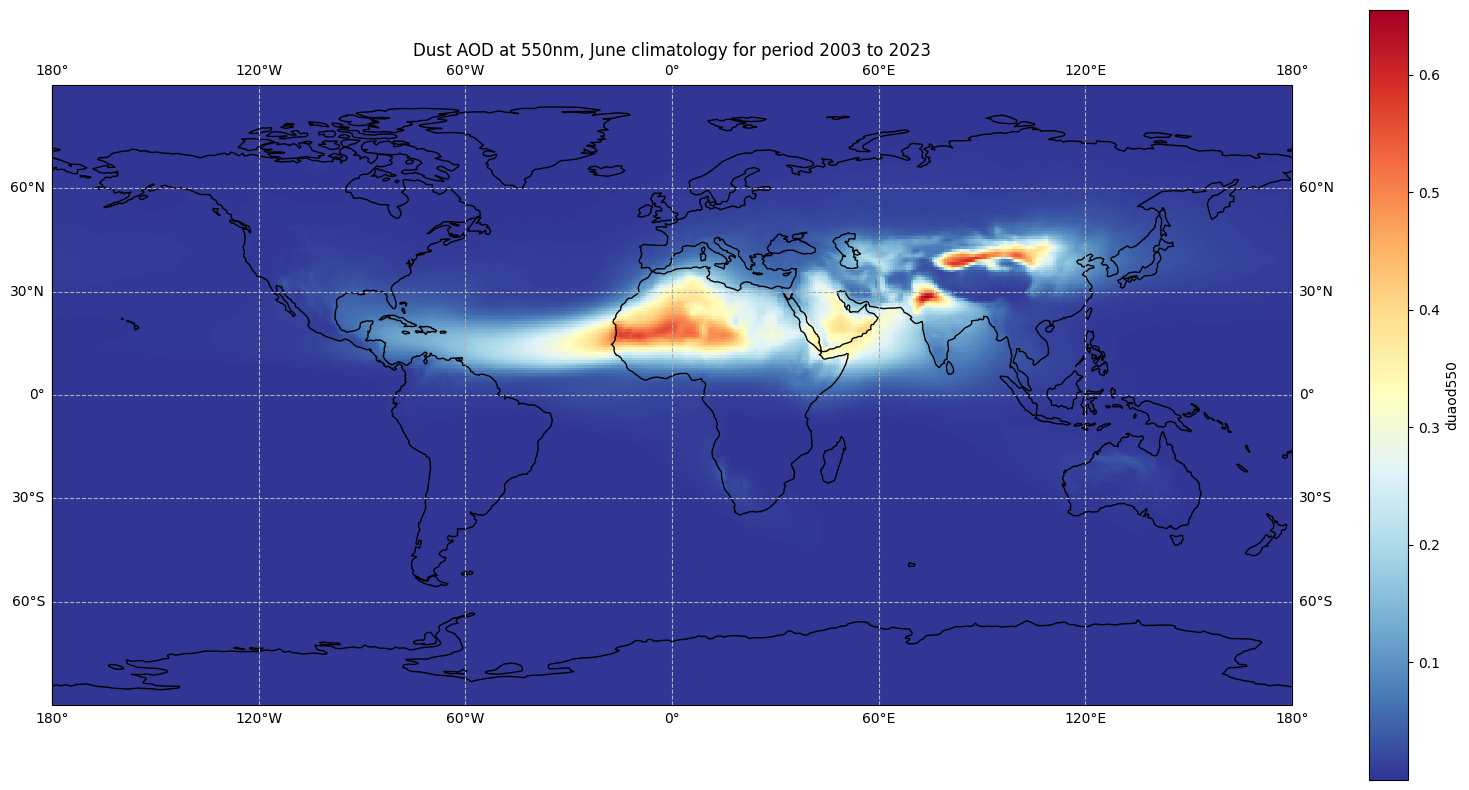

In [19]:
_, ax = create_figure() # Call the function to create a map figure
climatology.plot.pcolormesh(ax=ax, x='longitude', y='latitude', add_colorbar=True, cmap='RdYlBu_r')
plt.title('Dust AOD at 550nm, June climatology for period 2003 to 2023', fontsize=12)
plt.savefig('dust_aod_june_2003-2023_climatology.png')

### Plot a map of the dust AOD anomaly for June 2020

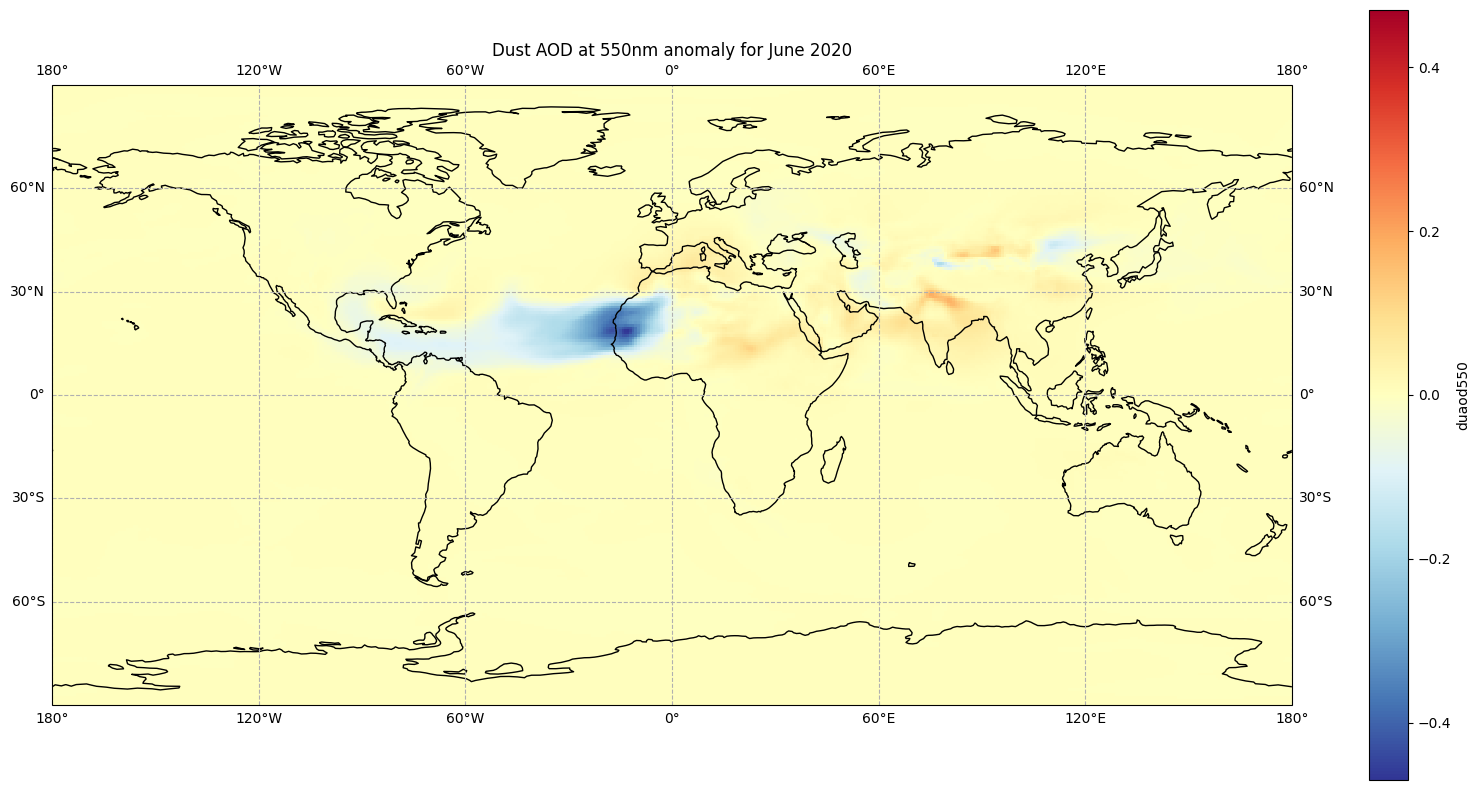

In [20]:
_, ax = create_figure() # Call the function to create a map figure
june2020.plot.pcolormesh(ax=ax, x='longitude', y='latitude', add_colorbar=True, cmap='RdYlBu_r')
plt.title('Dust AOD at 550nm anomaly for June 2020', fontsize=12)
plt.savefig('dust_aod_june2020_anomaly.png')

The anomaly map puts events into context. In this case we can see the Godzilla dust storm produced higher than average dust in the atmosphere in June 2020, with respect to the 2003 to 2023 climatology. For more information about this event, visit https://atmosphere.copernicus.eu/tracking-massive-dust-cloud-africa-america

## Suggested further steps

Carry-out the same steps, but for organic matter AOD and with a focus on Africa (add `'area': [40, -20, -40, 55,]` in the data retreive script, or select North 40, East 50, South -40, West -20 in the `Restricted area` field of the data download form.)

Were the wildfire emissions in June 2020 in Africa greater or less than the 2003 to 2023 climatological average?